# Livelihood Analysis


In [1]:
#Importing Necessary Packages

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel
from pystout import pystout
from tabulate import tabulate
import latextable

In [2]:
def confint(data):
    ci = 1.96 * np.std(data) / np.sqrt(len(data)-1)
    return ci

# Analyzing Livelihood Strategies

This includes Sections A-D in Calendar data


In [3]:
#Cleaning the data
raw_data = pd.read_csv('ClimateChangeCalendar.csv')
raw_data.replace(' ',0, inplace=True)
livelihoods = pd.DataFrame()
livelihoods['HHID'] = raw_data['HHID']

target_columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'B9', 'B10', 'B11', 'C12', 'C13', 'D14', 'D15', 'D16']

for item in raw_data.columns:
    
    for col in target_columns:
        if col in item:        
            livelihoods[item] = raw_data[item].astype(float)
        
livelihoods

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_18778/1119256498.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  livelihoods[item] = raw_data[item].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_18778/1119256498.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  livelihoods[item] = raw_data[item].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_18778/1119256498.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_18778/1119256498.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  livelihoods[item] = raw_data[item].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_18778/1119256498.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  livelihoods[item] = raw_data[item].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_18778/1119256498.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_18778/1119256498.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  livelihoods[item] = raw_data[item].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_18778/1119256498.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  livelihoods[item] = raw_data[item].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_18778/1119256498.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

,HHID,A1_72,A1_73,A1_74,A1_75,A1_76,A1_77,A1_78,A1a_72,A1a_73,...,D16_76,D16_77,D16_78,D16a_72,D16a_73,D16a_74,D16a_75,D16a_76,D16a_77,D16a_78
0,2301006,1.0,1.0,0.0,0.0,0.0,1.0,1.0,20.0,20.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,2301007,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,-1.0,...,1.0,0.0,0.0,72000.0,75000.0,77000.0,80000.0,90000.0,-1.0,-1.0
2,2301013,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.5,4.5,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,2301016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,8.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,2301017,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,7.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15.0,15.0,...,3.0,3.0,3.0,198000.0,198000.0,198000.0,198000.0,324000.0,324000.0,324000.0
496,2611115,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0,11.0,...,1.0,1.0,2.0,-1.0,-1.0,200000.0,220000.0,240000.0,210000.0,300000.0
497,2611117,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40.0,40.0,...,1.0,1.0,0.0,150000.0,150000.0,160000.0,170000.0,145000.0,150000.0,-1.0
498,2611118,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,20.0,...,1.0,1.0,1.0,20000.0,21000.0,22000.0,20000.0,22000.0,23000.0,22000.0


In [4]:
#Selecting Only Columns related to (1) land planted for crops; (2) number of migrants; and (3) non-farm jobs

main_livelihoods = pd.DataFrame()
main_livelihoods['HHID'] = livelihoods['HHID']

target_livelihoods = ['A1a', 'A2a', 'A3a', 'A4a', 'A5a', 'C12_', 'C13_', 'D14_', 'D15_', 'D16_'] #Livelihoods we want to analyze

for col in livelihoods.columns:
    for item in target_livelihoods:
        if item in col:
            main_livelihoods[col] = livelihoods[col].astype(float)

main_livelihoods

main_livelihoods[['C12_77', 'C12_78']]
        


,C12_77,C12_78
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,4.0,4.0
4,0.0,0.0
...,...,...
495,0.0,0.0
496,0.0,0.0
497,0.0,0.0
498,0.0,0.0


In [5]:
#Pivoting data from wide to long

column_heads = []

for item in target_livelihoods:
    if '_' in item:
        column_heads.append(item[:-1])
    else:
        column_heads.append(item)

pivoted_livelihoods = pd.wide_to_long(main_livelihoods, column_heads, i='HHID', j="Year", sep='_').reset_index()

pivoted_livelihoods[pivoted_livelihoods < 0] = 0

pivoted_livelihoods

,HHID,Year,A1a,A2a,A3a,A4a,A5a,C12,C13,D14,D15,D16
0,2301006,72,20.0,20.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2301007,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2301013,72,4.5,4.5,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0
3,2301016,72,8.0,8.0,0.0,8.0,0.0,4.0,0.0,1.0,0.0,0.0
4,2301017,72,7.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2611114,78,15.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,3.0
3496,2611115,78,11.0,4.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0
3497,2611117,78,40.0,11.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0
3498,2611118,78,20.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
#Calculating yearly sums across all respondents
sum_livelihoods = pivoted_livelihoods.groupby('Year').sum()

sum_livelihoods.drop(labels=['HHID'], axis=1, inplace=True)
sum_livelihoods


,A1a,A2a,A3a,A4a,A5a,C12,C13,D14,D15,D16
Year,,,,,,,,,,
72,5467.25,3444.05,32.5,2984.5,86.75,39.0,150.0,41.0,72.0,163.0
73,5525.75,3454.55,62.5,3044.0,81.75,41.0,156.0,45.0,71.0,165.0
74,5453.75,3401.55,32.5,3027.0,123.75,43.0,155.0,47.0,79.0,173.0
75,5418.20,3336.50,28.5,3079.5,122.75,42.0,166.0,53.0,90.0,174.0
76,5561.20,3530.00,33.5,3256.0,150.75,41.0,172.0,61.0,94.0,187.0
77,5560.80,3600.70,87.5,3393.0,249.75,49.0,170.0,71.0,103.0,206.0
78,5512.00,3638.70,148.5,3500.5,285.25,52.0,190.0,93.0,111.0,220.0


In [7]:
#Re-scaling livelihoods.
#Farm-based livelihoods (A...) are expressed as proportion of total land planted.
#Other livelihoods are expressed as proportion of households

total_land = np.zeros(len(sum_livelihoods))

for i in range(len(sum_livelihoods)):
    total_land[i] = sum_livelihoods.iloc[i,0:5].sum()

sum_livelihoods['Total_Land'] = total_land

livelihood_proportion = pd.DataFrame()
#livelihood_proportion['Year'] = sum_livelihoods['Year']

for col in sum_livelihoods.columns:
    if 'A' in col:
        livelihood_proportion[col] = sum_livelihoods[col] / sum_livelihoods['Total_Land']
    else:
        livelihood_proportion[col] = sum_livelihoods[col] / len(main_livelihoods)

livelihood_proportion

,A1a,A2a,A3a,A4a,A5a,C12,C13,D14,D15,D16,Total_Land
Year,,,,,,,,,,,
72,0.455033,0.286645,0.002705,0.248397,0.007220,0.078,0.300,0.082,0.144,0.326,24.0301
73,0.454101,0.283892,0.005136,0.250153,0.006718,0.082,0.312,0.090,0.142,0.330,24.3371
74,0.453024,0.282555,0.002700,0.251442,0.010279,0.086,0.310,0.094,0.158,0.346,24.0771
75,0.452065,0.278379,0.002378,0.256937,0.010242,0.084,0.332,0.106,0.180,0.348,23.9709
76,0.443779,0.281691,0.002673,0.259826,0.012030,0.082,0.344,0.122,0.188,0.374,25.0629
77,0.431346,0.279303,0.006787,0.263192,0.019373,0.098,0.340,0.142,0.206,0.412,25.7835
78,0.421247,0.278083,0.011349,0.267521,0.021800,0.104,0.380,0.186,0.222,0.440,26.1699


In [8]:
#Aggregating Column Names

#livelihood_proportion['Cereal_Crops'] = livelihood_proportion['A1a']
cereal_crops = np.zeros(len(livelihood_proportion))
cash_crops = np.zeros(len(livelihood_proportion))
migration = np.zeros(len(livelihood_proportion))
local_migration = np.zeros(len(livelihood_proportion))
intl_migration = np.zeros(len(livelihood_proportion))
nonfarm = np.zeros(len(livelihood_proportion))

for i in range(len(livelihood_proportion)):
    cereal_crops[i] = livelihood_proportion.iloc[i,0:3].sum()
    cash_crops[i] = livelihood_proportion.iloc[i,3:5].sum()
    migration[i] = livelihood_proportion.iloc[i,5:7].sum()
    local_migration[i] = livelihood_proportion.iloc[i,5:6].sum()
    intl_migration[i] = livelihood_proportion.iloc[i,6:7].sum()
    nonfarm[i] = livelihood_proportion.iloc[i,7:10].sum()

livelihood_proportion['Cereal Crops'] = cereal_crops
livelihood_proportion['Cash Crops'] = cash_crops
livelihood_proportion['Total Migration'] = migration
livelihood_proportion['Local Migration'] = local_migration
livelihood_proportion['Intl Migration'] = intl_migration
livelihood_proportion['NonFarm Jobs'] = nonfarm


#livelihood_proportion.reset_index()

livelihood_proportion.to_csv('AnnualLivelihoodProportion.csv')

livelihood_proportion

,A1a,A2a,A3a,A4a,A5a,C12,C13,D14,D15,D16,Total_Land,Cereal Crops,Cash Crops,Total Migration,Local Migration,Intl Migration,NonFarm Jobs
Year,,,,,,,,,,,,,,,,,
72,0.455033,0.286645,0.002705,0.248397,0.007220,0.078,0.300,0.082,0.144,0.326,24.0301,0.744383,0.255617,0.378,0.078,0.300,0.552
73,0.454101,0.283892,0.005136,0.250153,0.006718,0.082,0.312,0.090,0.142,0.330,24.3371,0.743129,0.256871,0.394,0.082,0.312,0.562
74,0.453024,0.282555,0.002700,0.251442,0.010279,0.086,0.310,0.094,0.158,0.346,24.0771,0.738278,0.261722,0.396,0.086,0.310,0.598
75,0.452065,0.278379,0.002378,0.256937,0.010242,0.084,0.332,0.106,0.180,0.348,23.9709,0.732822,0.267178,0.416,0.084,0.332,0.634
76,0.443779,0.281691,0.002673,0.259826,0.012030,0.082,0.344,0.122,0.188,0.374,25.0629,0.728144,0.271856,0.426,0.082,0.344,0.684
77,0.431346,0.279303,0.006787,0.263192,0.019373,0.098,0.340,0.142,0.206,0.412,25.7835,0.717436,0.282564,0.438,0.098,0.340,0.760
78,0.421247,0.278083,0.011349,0.267521,0.021800,0.104,0.380,0.186,0.222,0.440,26.1699,0.710679,0.289321,0.484,0.104,0.380,0.848


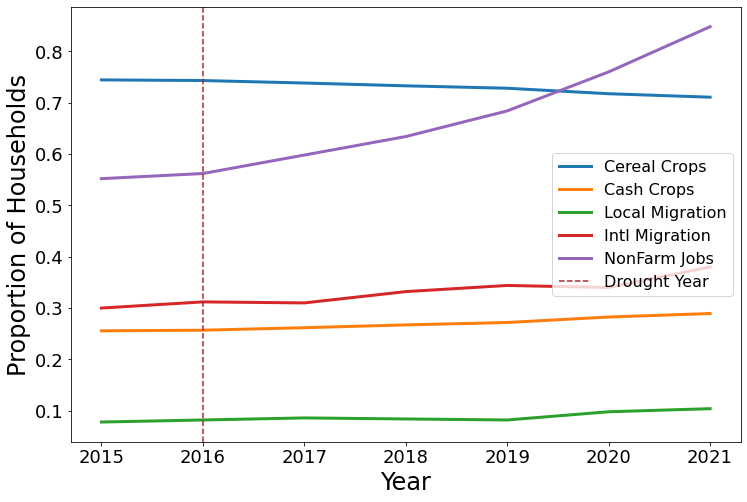

In [9]:
#Plotting Data
x = np.linspace(2015, 2021, 7)
f, ax1 = plt.subplots(figsize=[12,8]) 

strategies = ['Cereal Crops', 'Cash Crops', 'Local Migration', 'Intl Migration', 'NonFarm Jobs']
for item in strategies:
    ax1.plot(x, livelihood_proportion[item], label=item, lw=3)

ax1.set_ylabel('Proportion of Households', size=24)
ax1.set_xlabel('Year', size=24)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.axvline(x=2013, ls='--', label = 'Flood')
plt.axvline(x=2016, ls='--', color = 'brown', label = 'Drought Year')
plt.legend(fontsize=16)
plt.show()

#plt.savefig('LivelihoodChoices.png', bbox_inches='tight')

# Section E: Livelihood Intentions

In [10]:
#Loading Livelihood Intentions
raw_data = pd.read_csv('ClimateChangeData.csv')

intentions = pd.DataFrame()

intentions['HHID'] = raw_data['HHID']

for col in raw_data.columns:
    if 'E1' in col or 'E2' in col or 'E3' in col:
        intentions[col] = raw_data[col]
        
intentions


,HHID,E1_1,E1_2,E1_3,E1_4,E1_5,E1_6,E1_7,E1_8,E1_9,...,E3_6,E3_7,E3_8,E3_9,E3_10,E3_11,E3_12,E3_97,E3_97_1,E3_97_1_1
0,2301006,3,3,3,3,3,2,3,3,2,...,3,2,2,1,3,1,3,0,-1,-1
1,2301007,2,2,2,2,2,2,2,3,3,...,3,1,2,2,1,1,1,0,-1,-1
2,2301013,2,1,2,1,2,2,2,2,3,...,3,1,2,2,2,1,1,0,-1,-1
3,2301016,3,3,2,2,3,2,2,3,3,...,3,3,3,3,1,1,3,0,-1,-1
4,2301017,3,3,2,2,2,3,2,3,2,...,3,1,2,1,2,1,1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,2,3,3,3,2,2,1,3,2,...,3,3,3,1,2,3,1,0,-1,-1
496,2611115,2,2,2,2,2,2,3,3,3,...,3,1,1,1,1,3,3,0,-1,-1
497,2611117,1,2,1,2,1,2,2,1,3,...,3,2,2,2,2,1,1,0,-1,-1
498,2611118,3,3,3,2,2,2,3,3,3,...,3,1,1,1,1,3,3,0,-1,-1


In [11]:
#Cleaning Column Heads

questions = {'E1':'Riskiness', 'E2':'Intention', 'E3':'PolicyIntention'}
livelihoods = ['CerealCrops', 'Non-CerealCrops', 'Fruit/Veg', 'LargeAnimal', 'SmallAnimal', 'Poultry', 'LocalMigrate', 'IntlMigrate', 'Business', 'Salary', 'Wage', 'Pension', 'Other', 'Other-Specify', 'Other-Specify2']

column_names = {}
for i, col in enumerate(intentions.columns[1:]):
    c_index = int(i/15)
    l_index = int(i % 15)
    if c_index == 0:
        column_names[col] = 'Riskiness_'+ livelihoods[l_index]
    elif c_index == 1:
        column_names[col] = 'Intention_'+ livelihoods[l_index]
    else:
        column_names[col] = 'PolicyIntention_'+ livelihoods[l_index]

        
intentions.rename(columns=column_names, inplace=True)


intentions
    

,HHID,Riskiness_CerealCrops,Riskiness_Non-CerealCrops,Riskiness_Fruit/Veg,Riskiness_LargeAnimal,Riskiness_SmallAnimal,Riskiness_Poultry,Riskiness_LocalMigrate,Riskiness_IntlMigrate,Riskiness_Business,...,PolicyIntention_Poultry,PolicyIntention_LocalMigrate,PolicyIntention_IntlMigrate,PolicyIntention_Business,PolicyIntention_Salary,PolicyIntention_Wage,PolicyIntention_Pension,PolicyIntention_Other,PolicyIntention_Other-Specify,PolicyIntention_Other-Specify2
0,2301006,3,3,3,3,3,2,3,3,2,...,3,2,2,1,3,1,3,0,-1,-1
1,2301007,2,2,2,2,2,2,2,3,3,...,3,1,2,2,1,1,1,0,-1,-1
2,2301013,2,1,2,1,2,2,2,2,3,...,3,1,2,2,2,1,1,0,-1,-1
3,2301016,3,3,2,2,3,2,2,3,3,...,3,3,3,3,1,1,3,0,-1,-1
4,2301017,3,3,2,2,2,3,2,3,2,...,3,1,2,1,2,1,1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,2,3,3,3,2,2,1,3,2,...,3,3,3,1,2,3,1,0,-1,-1
496,2611115,2,2,2,2,2,2,3,3,3,...,3,1,1,1,1,3,3,0,-1,-1
497,2611117,1,2,1,2,1,2,2,1,3,...,3,2,2,2,2,1,1,0,-1,-1
498,2611118,3,3,3,2,2,2,3,3,3,...,3,1,1,1,1,3,3,0,-1,-1


In [12]:
#Rescale intentions so that 0 = 'Not likely', 0.5 = 'Somewhat Likely', 1 = 'Highly Likely'
rescale_intentions = pd.DataFrame()

rescale_intentions['HHID'] = intentions['HHID']

for col in intentions.columns:
    if 'Intention_' in col:
        rescale_intentions[col] = (intentions[col] - 1) / 2

rescale_intentions

,HHID,Intention_CerealCrops,Intention_Non-CerealCrops,Intention_Fruit/Veg,Intention_LargeAnimal,Intention_SmallAnimal,Intention_Poultry,Intention_LocalMigrate,Intention_IntlMigrate,Intention_Business,...,PolicyIntention_Poultry,PolicyIntention_LocalMigrate,PolicyIntention_IntlMigrate,PolicyIntention_Business,PolicyIntention_Salary,PolicyIntention_Wage,PolicyIntention_Pension,PolicyIntention_Other,PolicyIntention_Other-Specify,PolicyIntention_Other-Specify2
0,2301006,0.0,0.5,0.0,0.0,0.5,1.0,0.5,0.5,0.0,...,1.0,0.5,0.5,0.0,1.0,0.0,1.0,-0.5,-1.0,-1.0
1,2301007,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.5,0.5,...,1.0,0.0,0.5,0.5,0.0,0.0,0.0,-0.5,-1.0,-1.0
2,2301013,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.5,...,1.0,0.0,0.5,0.5,0.5,0.0,0.0,-0.5,-1.0,-1.0
3,2301016,0.5,0.5,0.0,0.5,0.5,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-0.5,-1.0,-1.0
4,2301017,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.5,0.0,...,1.0,0.0,0.5,0.0,0.5,0.0,0.0,-0.5,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.0,1.0,0.5,0.0,0.5,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.5,1.0,0.0,-0.5,-1.0,-1.0
496,2611115,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.5,-1.0,-1.0
497,2611117,1.0,1.0,0.5,1.0,1.0,1.0,0.5,0.5,0.5,...,1.0,0.5,0.5,0.5,0.5,0.0,0.0,-0.5,-1.0,-1.0
498,2611118,1.0,1.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.5,-1.0,-1.0


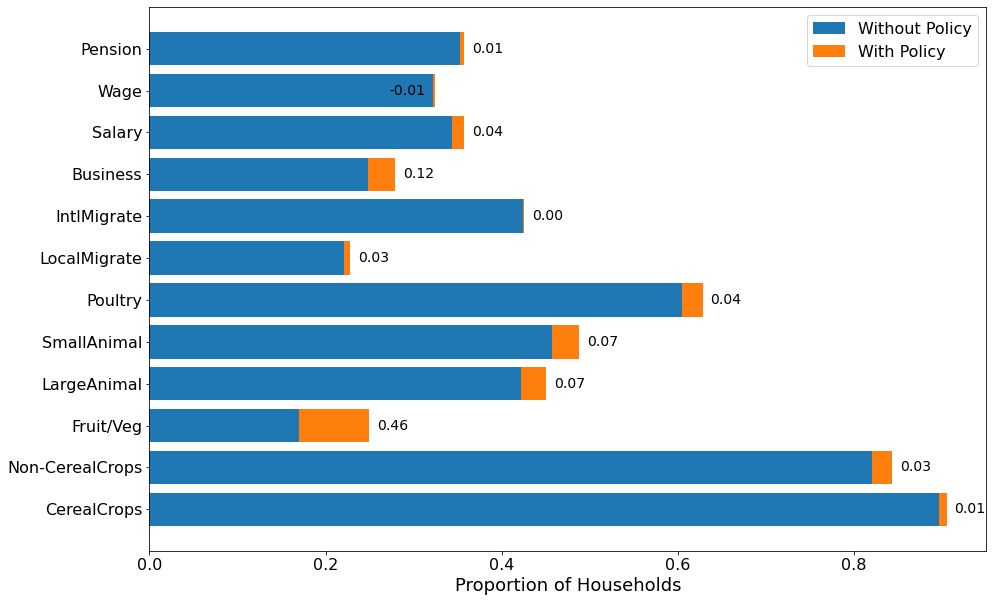

In [13]:
xpos = np.arange(0,12,1)

current_intentions = rescale_intentions.iloc[:,1:13]
future_intentions = rescale_intentions.iloc[:, -15:-3]

y_values = []
y_add = []
y_pct = []
labels = []
for col, pol in zip(current_intentions.columns, future_intentions.columns):
    y_values.append(current_intentions[col].sum() / len(rescale_intentions))
    y_add.append((future_intentions[pol].sum() - current_intentions[col].sum()) / len(rescale_intentions))
    y_pct.append(y_add[-1] / y_values[-1])
    labels.append(col[10:])

fig, ax = plt.subplots(figsize=[15,10])

b1 = ax.barh(xpos, y_values, )
b2 = ax.barh(xpos, y_add, left=y_values)
#plt.bar_label(y_pct, fmt='%.2f')
ax.bar_label(b2, labels=['%.2f' % e for e in y_pct],
             padding=8, color='black', fontsize=14)
plt.legend([b1,b2], ['Without Policy', 'With Policy'], fontsize=16)
plt.yticks(xpos, labels, fontsize=16)
plt.xticks(size=16)
plt.xlabel('Proportion of Households', fontsize=18)

plt.show()
#plt.savefig('PolicyEffects.png', bbox_inches='tight')


# Perceptions of Livelihood Risk

In [14]:
#Extracting Livelihood Risk Perception columns

perceptions = pd.DataFrame()
perceptions['HHID'] = intentions['HHID']

for col in intentions.columns:
    if ('Riskiness' in col) and ('Other' not in col):
        perceptions[col] = intentions[col]

perceptions.to_csv('LivelihoodPerceptions.csv')
perceptions

,HHID,Riskiness_CerealCrops,Riskiness_Non-CerealCrops,Riskiness_Fruit/Veg,Riskiness_LargeAnimal,Riskiness_SmallAnimal,Riskiness_Poultry,Riskiness_LocalMigrate,Riskiness_IntlMigrate,Riskiness_Business,Riskiness_Salary,Riskiness_Wage,Riskiness_Pension
0,2301006,3,3,3,3,3,2,3,3,2,2,2,1
1,2301007,2,2,2,2,2,2,2,3,3,3,3,1
2,2301013,2,1,2,1,2,2,2,2,3,2,3,2
3,2301016,3,3,2,2,3,2,2,3,3,2,3,1
4,2301017,3,3,2,2,2,3,2,3,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,2,3,3,3,2,2,1,3,2,2,3,2
496,2611115,2,2,2,2,2,2,3,3,3,3,3,3
497,2611117,1,2,1,2,1,2,2,1,3,1,1,1
498,2611118,3,3,3,2,2,2,3,3,3,2,2,1


In [15]:
#Re-scaling perceptions to fit [0,1] scale
rescale_perceptions = pd.DataFrame()
rescale_perceptions['HHID'] = perceptions['HHID']
for col in perceptions.columns[1:]:
    rescale_perceptions[col] = (perceptions[col] - 1) / 2

rescale_perceptions


,HHID,Riskiness_CerealCrops,Riskiness_Non-CerealCrops,Riskiness_Fruit/Veg,Riskiness_LargeAnimal,Riskiness_SmallAnimal,Riskiness_Poultry,Riskiness_LocalMigrate,Riskiness_IntlMigrate,Riskiness_Business,Riskiness_Salary,Riskiness_Wage,Riskiness_Pension
0,2301006,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,0.5,0.5,0.5,0.0
1,2301007,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,1.0,1.0,1.0,0.0
2,2301013,0.5,0.0,0.5,0.0,0.5,0.5,0.5,0.5,1.0,0.5,1.0,0.5
3,2301016,1.0,1.0,0.5,0.5,1.0,0.5,0.5,1.0,1.0,0.5,1.0,0.0
4,2301017,1.0,1.0,0.5,0.5,0.5,1.0,0.5,1.0,0.5,0.5,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0.5,1.0,1.0,1.0,0.5,0.5,0.0,1.0,0.5,0.5,1.0,0.5
496,2611115,0.5,0.5,0.5,0.5,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0
497,2611117,0.0,0.5,0.0,0.5,0.0,0.5,0.5,0.0,1.0,0.0,0.0,0.0
498,2611118,1.0,1.0,1.0,0.5,0.5,0.5,1.0,1.0,1.0,0.5,0.5,0.0


#Creating bar chart of livelihood risk perceptions

mean_perceptions = np.zeros(len(rescale_perceptions.columns[1:]))
err_perceptions = np.zeros(len(rescale_perceptions.columns[1:]))
ypos = np.arange(0, len(rescale_perceptions.columns[1:]), 1)
labels = []
colors = ['blue','blue', 'blue', 'orange', 'orange', 'orange', 'green', 'green', 'red', 'red', 'red', 'purple']
#categories = ['Farm', 'Farm', 'Farm', 'Livestock', 'Livestock', 'Livestock', 'Migrate', 'Migrate', 'Off-Farm Labor', 'Off-Farm Labor', 'Off-Farm Labor', 'Other']

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='green', lw=4),
               Line2D([0], [0], color='red', lw=4),
               Line2D([0], [0], color='purple', lw=4)]


for i, col in enumerate(rescale_perceptions.columns[1:]):
    mean_perceptions[i] = rescale_perceptions[col].mean()
    err_perceptions[i] = confint(rescale_perceptions[col])
    labels.append(col[10:])
    
fig, ax = plt.subplots(figsize=[15,10])
for i in range(len(mean_perceptions)):
    ax.barh(ypos[i], mean_perceptions[i], xerr = err_perceptions[i], color= colors[i])
ax.set_xlabel('Average Risk Perception (0 = "Not Risky", 1 = "Highly Risky")', fontsize=20)
#ax.set_ylim([0,13])
#ax.legend(custom_lines, ['Farm', 'Livestock', 'Migrate', 'Off-Farm Labor', 'Other'], fontsize=18, loc='lower right')
plt.yticks(ypos, labels, fontsize=18)
plt.xticks(fontsize=18)
#plt.show()
plt.savefig('LivelihoodRiskPerception.png', bbox_inches='tight')

[0.606 0.576 0.488 0.498 0.458 0.492 0.434 0.782 0.44  0.25  0.596 0.106]


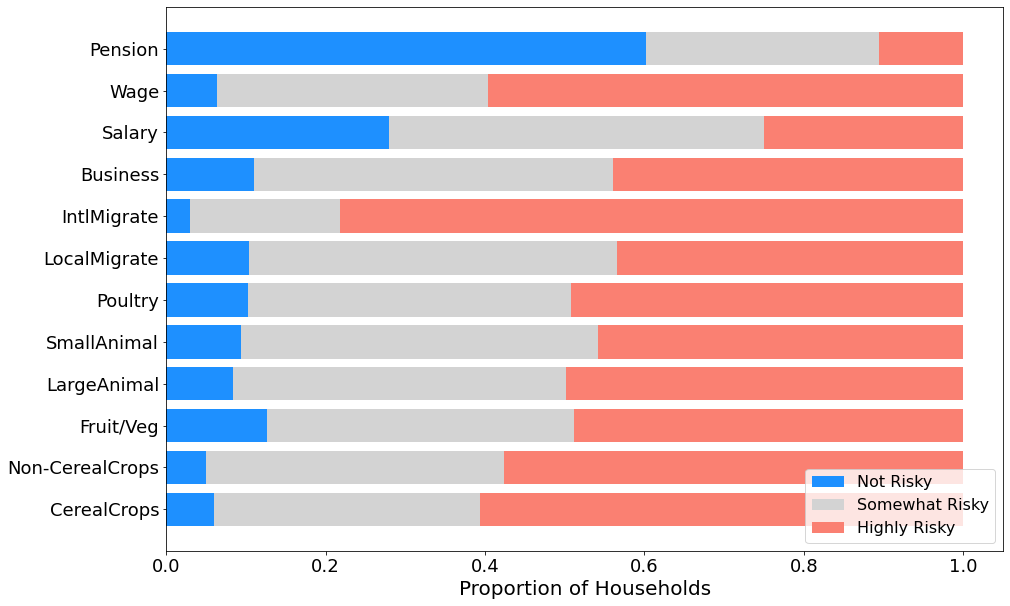

In [17]:
#Stacked Horizontal Bar Chart

low_risk = np.zeros(len(perceptions.columns[1:]))
med_risk = np.zeros(len(perceptions.columns[1:]))
high_risk = np.zeros(len(perceptions.columns[1:]))
labels = []

hh = len(perceptions)
ypos = np.arange(0, len(perceptions.columns[1:]))

for i, col in enumerate(perceptions.columns[1:]):
    low_risk[i] = np.count_nonzero(perceptions[col] == 1) / hh
    med_risk[i] = np.count_nonzero(perceptions[col] == 2) / hh
    high_risk[i] = np.count_nonzero(perceptions[col] == 3) / hh
    labels.append(col[10:])
    
print(high_risk)
fig, ax = plt.subplots(figsize=[15,10])

b1 = ax.barh(ypos, low_risk, color='dodgerblue')
b2 = ax.barh(ypos, med_risk, left=low_risk, color='lightgrey')
b3 = ax.barh(ypos, high_risk, left=(low_risk + med_risk), color='salmon')

ax.set_xlabel('Proportion of Households', fontsize=20)
plt.legend([b1,b2,b3], ['Not Risky', 'Somewhat Risky', 'Highly Risky'], fontsize=16)
plt.yticks(ypos, labels, fontsize=18)
plt.xticks(fontsize=18)

plt.show()
#plt.savefig('LivelihoodRiskPerception.png', bbox_inches='tight')